<a href="https://colab.research.google.com/github/sdharaskar/DS552/blob/main/DS553_S25_Assignment3_Swapnil_Dharaskar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Theory Questions**






*   **Q1: Why is the KL Divergence term important in the VAE loss function?**  
    **A1:** The KL Divergence term is a crucial component of the VAE loss function because it regularizes the latent space by forcing the learned latent distribution to remain close to a predefined prior (typically a standard normal distribution).
    
    Here are the key reasons why it is important:

    * **Latent Space Regularization:**
    The KL Divergence penalizes the model when the latent distribution deviates from the chosen prior. This ensures that the latent space does not become arbitrarily complex and remains smooth and continuous. Such regularization is essential for meaningful interpolation between latent vectors.

    * **Preventing Overfitting:**
    Without the KL term, the model might focus solely on minimizing reconstruction error, potentially learning to encode every detail of the training examples (i.e., memorizing them). The KL Divergence term acts as a regularizer that discourages overfitting by forcing the encoded representations to have a structured distribution.

    * **Facilitating Generative Capabilities:**
    By aligning the latent space with a known distribution, the VAE can generate new, plausible samples simply by drawing random vectors from this prior. If the latent space were not regularized, sampling random vectors might produce unrealistic or meaningless outputs.

    * **Enabling Smooth Interpolations:**
    A well-regularized latent space means that similar latent vectors correspond to similar outputs. This property is vital for tasks like interpolation—moving gradually in the latent space leads to smooth transitions in the generated images. Without the KL term, the latent space could be disjointed, making smooth interpolation difficult.
*   **Q2: How does the reparameterization trick enable backpropagation through the stochastic layers of a VAE?**
    **A2:** The reparameterization trick transforms the stochastic sampling operation into a differentiable computation by isolating the randomness from the model parameters. This enables gradient-based optimization even when sampling from a probability distribution. Following is a detailed explanation:

    **1. Separation of Deterministic and Random Parts**

    In a Variational Autoencoder (VAE), the encoder outputs parameters for a latent Gaussian distribution:
    - **Mean:**
$\mu$

    - **Log-variance:**
$ \log \sigma^2 $

    Instead of sampling \( z \) directly from $ \mathcal{N}(\mu, \sigma^2) $ (which is non-differentiable), the sampling is reformulated as:

    $$
    z = \mu + \sigma \cdot \epsilon
    $$

    where:
    - $ \sigma $ is computed as $ \sigma = \exp\left(0.5 \times \log \sigma^2\right) $.
    - $ \epsilon $ is sampled from a standard normal distribution $ \mathcal{N}(0,1) $.

    This formulation decouples the randomness (contained in $ \epsilon $) from the deterministic parameters $\mu$ and $\sigma$ that are functions of the network’s inputs.

    **2. Enabling Differentiability**

    Because $\epsilon$ is independent of the network parameters:
    - The term $ \mu + \sigma \cdot \epsilon $ becomes a differentiable function with respect to $ \mu $ and $ \sigma $.
    - This means that during backpropagation, gradients can flow through $ \mu $ and $ \sigma $ without being blocked by the stochastic sampling operation.

    **3. Supporting Gradient-Based Optimization**

    By incorporating the reparameterization trick:
    - **End-to-End Differentiability:** The entire sampling process becomes part of the computation graph, making it possible to update the encoder's parameters using gradient descent.
    - **Effective Learning:** The model can learn to adjust $ \mu $ and $ \sigma $ to minimize the loss function, even though part of the model involves randomness.

*   **Q3:** Why does a VAE use a probabilistic latent space instead of a fixed latent space?
    **A3:** A Variational Autoencoder (VAE) uses a probabilistic latent space rather than a fixed (deterministic) one for several important reasons:
    **Generative Capability:**
    By learning a probability distribution (often a Gaussian) in the latent space, a VAE can sample new latent vectors to generate novel data. This enables the model not only to reconstruct input data but also to create entirely new, plausible examples that resemble the training data.

    **Smooth Interpolation and Continuity:**
    A probabilistic latent space is regularized (usually via the KL divergence term) to approximate a simple prior (like a standard normal distribution). This regularization ensures that nearby points in the latent space correspond to similar outputs. As a result, you can smoothly interpolate between latent vectors, and the generated outputs transition gradually, reflecting a continuous underlying manifold.

    **Regularization and Generalization:**
    Introducing a stochastic component forces the model to capture the inherent uncertainty and variability in the data. Rather than memorizing a deterministic mapping from inputs to a single point in the latent space, the VAE learns to represent each input as a distribution. This not only helps in avoiding overfitting but also improves the model’s ability to generalize to unseen data.

    **Variational Inference Framework:**
    The VAE is based on variational inference, which approximates the true, often intractable, posterior distribution of latent variables. Using a probabilistic latent space is essential in this framework because it allows the model to learn an approximate posterior that is both flexible and tractable, enabling efficient training through backpropagation via the reparameterization trick.

    **Handling Data Ambiguity:**
    In many real-world scenarios, the mapping from data to latent factors is ambiguous or multimodal. A probabilistic latent space can capture such uncertainty by representing an input as a distribution over latent variables instead of a single point, better reflecting the underlying variability of the data.
*   **Q4: What role does KL Divergence play in ensuring a smooth latent space?**  
    **A4:** In a Variational Autoencoder (VAE), the KL Divergence term plays a critical role in regularizing the latent space. It contributes to a smooth and well-behaved latent space by:

    1. **Regularizing the Latent Distribution:**  
      The KL Divergence measures the difference between the encoder’s learned latent distribution $ q(z|x) $ (parameterized by $\mu$ and $\sigma$) and a chosen prior distribution $ p(z) $, which is typically a standard normal distribution $ \mathcal{N}(0, I) $. By minimizing this divergence, the VAE is encouraged to make $ q(z|x) $ similar to $ p(z) $ for all inputs. This prevents the latent space from becoming arbitrarily complex or overfitted to the training data.

    2. **Encouraging Continuity and Smoothness:**  
      When the latent distributions for different inputs are close to the same prior, it implies that the latent space is organized in a smooth and continuous manner. Small changes in the latent variables then correspond to gradual changes in the generated output. This continuity is essential for:
      - **Interpolation:** Smooth transitions between latent vectors yield meaningful intermediate generations.
      - **Sampling:** Random samples drawn from the prior (e.g., $\mathcal{N}(0, I)$) are likely to fall into regions of the latent space that produce plausible outputs.

    3. **Avoiding Discontinuities and “Holes”:**  
      Without the KL Divergence term, the encoder could map each input to a very different, potentially isolated region of the latent space. This would result in a discontinuous latent space where interpolating between two points might lead to regions with no meaningful representation. The KL penalty helps fill in these gaps by spreading the encoded representations over a well-defined, smooth manifold.

    4. **Balancing Reconstruction and Generalization:**  
      While the reconstruction loss ensures that the output closely matches the input, the KL Divergence term prevents the model from simply memorizing the training data. It forces the model to generalize by distributing the latent representations in a structured way. This balance allows the VAE to both reconstruct well and generate novel, coherent samples from the latent space.

This ensures that nearby points in the latent space lead to similar outputs, enabling effective interpolation and robust generation of new data.






# **2. Coding Tasks**

In [ ]:
# !pip install torch
# !pip install torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# VAE Architecture
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        # Decoder
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc_mu(h1), self.fc_logvar(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h2 = torch.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h2))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


In [ ]:
# Loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


In [ ]:
# Training the VAE
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset)}')

In [ ]:
# Load MNIST dataset and run the training
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

vae = VAE(input_dim=784, hidden_dim=400, latent_dim=20)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

for epoch in range(1, 11):
    train(vae, train_loader, optimizer, epoch)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 70.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 30.2MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 47.6MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.41MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 164.90710615234374
Epoch 2, Loss: 121.82060092773438
Epoch 3, Loss: 114.84291357421876
Epoch 4, Loss: 111.81297320963542
Epoch 5, Loss: 110.022540234375
Epoch 6, Loss: 108.85526114908855
Epoch 7, Loss: 108.02283123372396
Epoch 8, Loss: 107.3854788248698
Epoch 9, Loss: 106.83267688802083
Epoch 10, Loss: 106.38571868489583


In [ ]:
import matplotlib.pyplot as plt

# Function to generate and display new images
def generate_images(model, num_images=10, latent_dim=20):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Turn off gradients for generation
        # Sample random points from the latent space (standard normal distribution)
        z = torch.randn(num_images, latent_dim)
        # Decode these points to generate images
        generated_images = model.decode(z).cpu()

    # Plot the generated images
    fig, axs = plt.subplots(1, num_images, figsize=(num_images, 1.5))
    for i in range(num_images):
        axs[i].imshow(generated_images[i].view(28, 28), cmap='gray')
        axs[i].axis('off')
    plt.show()




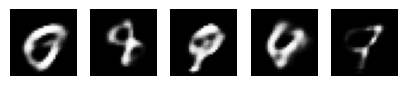

In [ ]:
# Assuming you have already trained the model (vae) and it has a latent dimension of 20
generate_images(vae, num_images=5, latent_dim=20)

# Task 1

100%|██████████| 170M/170M [00:01<00:00, 85.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch 1, Loss: 1902.8680
Epoch 2, Loss: 1842.6100
Epoch 3, Loss: 1838.6625
Epoch 4, Loss: 1836.8900
Epoch 5, Loss: 1835.8617
Epoch 6, Loss: 1835.2241
Epoch 7, Loss: 1834.3768
Epoch 8, Loss: 1833.7822
Epoch 9, Loss: 1833.1051
Epoch 10, Loss: 1832.9664
Epoch 11, Loss: 1832.2871
Epoch 12, Loss: 1831.9578
Epoch 13, Loss: 1831.8298
Epoch 14, Loss: 1831.5247
Epoch 15, Loss: 1831.4238
Epoch 16, Loss: 1830.9898
Epoch 17, Loss: 1830.8830
Epoch 18, Loss: 1830.7315
Epoch 19, Loss: 1830.7308
Epoch 20, Loss: 1830.4305


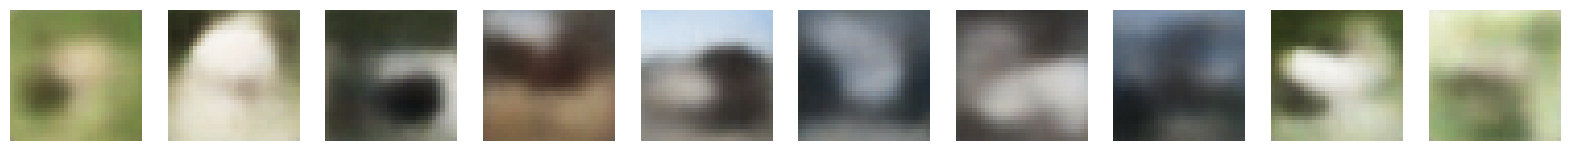

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Convolutional VAE for CIFAR-10
class ConvVAE(nn.Module):
    def __init__(self, latent_dim):
        super(ConvVAE, self).__init__()
        # Encoder: Input size (3, 32, 32)
        # Conv layers reduce spatial dimensions: 32 -> 16 -> 8 -> 4
        self.enc_conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=4, stride=2, padding=1)   # Output: 32 x 16 x 16
        self.enc_conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2, padding=1)  # Output: 64 x 8 x 8
        self.enc_conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1) # Output: 128 x 4 x 4

        # Fully connected layers for the latent distribution
        self.fc_mu = nn.Linear(128 * 4 * 4, latent_dim)
        self.fc_logvar = nn.Linear(128 * 4 * 4, latent_dim)

        # Decoder: map latent vector to a feature map
        self.fc_decode = nn.Linear(latent_dim, 128 * 4 * 4)

        # Decoder: Transposed conv layers to upsample back to (3, 32, 32)
        self.dec_conv1 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=4, stride=2, padding=1)  # Output: 64 x 8 x 8
        self.dec_conv2 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=4, stride=2, padding=1)   # Output: 32 x 16 x 16
        self.dec_conv3 = nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=4, stride=2, padding=1)    # Output: 3 x 32 x 32

    def encode(self, x):
        x = F.relu(self.enc_conv1(x))
        x = F.relu(self.enc_conv2(x))
        x = F.relu(self.enc_conv3(x))
        x = x.view(x.size(0), -1)  # Flatten the feature maps (batch, 128*4*4)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        x = self.fc_decode(z)
        x = x.view(-1, 128, 4, 4)  # Reshape to (batch, 128, 4, 4)
        x = F.relu(self.dec_conv1(x))
        x = F.relu(self.dec_conv2(x))
        x = torch.sigmoid(self.dec_conv3(x))  # Output pixel values between 0 and 1
        return x

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

# Loss function remains similar: reconstruction loss (BCE) + KL divergence
def loss_function(recon_x, x, mu, logvar):
    # Both recon_x and x have shape (batch, 3, 32, 32)
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training function
def train(model, train_loader, optimizer, epoch, device):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset):.4f}')

# Function to generate and display new images
def generate_images(model, num_images, latent_dim, device):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for generation
        # Sample random points from the latent space
        z = torch.randn(num_images, latent_dim).to(device)
        generated_images = model.decode(z).cpu()
    # Plot the generated images
    fig, axs = plt.subplots(1, num_images, figsize=(num_images * 2, 2))
    for i in range(num_images):
        # Transpose from (C, H, W) to (H, W, C) for plotting
        axs[i].imshow(generated_images[i].permute(1, 2, 0))
        axs[i].axis('off')
    plt.show()

# Load CIFAR-10 dataset
transform = transforms.ToTensor()
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate and train the convolutional VAE
latent_dim = 20
conv_vae = ConvVAE(latent_dim).to(device)
optimizer = optim.Adam(conv_vae.parameters(), lr=1e-3)

num_epochs = 20  # You can adjust the number of epochs as needed
for epoch in range(1, num_epochs + 1):
    train(conv_vae, train_loader, optimizer, epoch, device)

# Generate and display images from the convolutional VAE
generate_images(conv_vae, num_images=10, latent_dim=latent_dim, device=device)


# Task 2

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def interpolate_images(model, image1, image2, num_steps=10, device='cpu'):
    """
    Interpolates between two images in the latent space and displays the intermediate images.

    Parameters:
        model: Trained VAE model with `encode`, `reparameterize`, and `decode` methods.
        image1, image2: Two input images (as tensors) to interpolate between.
                        Expected shape: (C, H, W); if from a dataset, they likely come without batch dimension.
        num_steps: Number of interpolation steps (including the start and end images).
        device: The device on which to perform computations (e.g., 'cuda' or 'cpu').
    """
    model.eval()  # Set the model to evaluation mode.
    with torch.no_grad():
        # Ensure images have a batch dimension and are on the proper device.
        if image1.dim() == 3:
            image1 = image1.unsqueeze(0)
        if image2.dim() == 3:
            image2 = image2.unsqueeze(0)
        image1 = image1.to(device)
        image2 = image2.to(device)

        # Encode both images to get their latent representations.
        mu1, logvar1 = model.encode(image1)
        z1 = model.reparameterize(mu1, logvar1)

        mu2, logvar2 = model.encode(image2)
        z2 = model.reparameterize(mu2, logvar2)

        # Prepare a list to collect the decoded (reconstructed) images.
        interpolated_images = []

        # Linear interpolation in the latent space.
        # t=0 corresponds to z1, and t=1 corresponds to z2.
        for t in np.linspace(0, 1, num_steps):
            # Linear interpolation between z1 and z2.
            z = (1 - t) * z1 + t * z2
            recon = model.decode(z)
            interpolated_images.append(recon.cpu())

        # Stack all the images: resulting shape will be (num_steps, C, H, W)
        interpolated_images = torch.cat(interpolated_images, dim=0)

    # Plot the interpolated images in a grid.
    fig, axs = plt.subplots(1, num_steps, figsize=(num_steps * 2, 2))
    for i in range(num_steps):
        # If the image is in (C, H, W), rearrange to (H, W, C) for plotting.
        img = interpolated_images[i].permute(1, 2, 0)
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.suptitle("Latent Space Interpolation")
    plt.show()

# Example usage:
# Suppose you have two images from the CIFAR-10 dataset (or any other dataset) that you want to interpolate.
# For example, let image1 and image2 be two samples from your dataset:
#
#   image1, _ = cifar_dataset[0]   # Shape: (3, 32, 32)
#   image2, _ = cifar_dataset[1]   # Shape: (3, 32, 32)
#
# And assume your trained VAE model is called `conv_vae` and is on the appropriate device.
#
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# conv_vae.to(device)
#
# Then, you can interpolate between the two images:
#
# interpolate_images(conv_vae, image1, image2, num_steps=10, device=device)


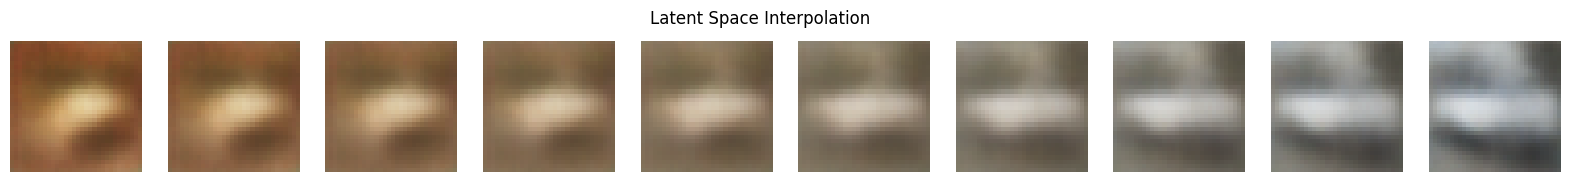

In [ ]:
# Example usage:
# Suppose you have two images from the CIFAR-10 dataset (or any other dataset) that you want to interpolate.
# For example, let image1 and image2 be two samples from your dataset:
#
image1, _ = train_dataset[0]   # Shape: (3, 32, 32)
image2, _ = train_dataset[1]   # Shape: (3, 32, 32)
#
# And assume your trained VAE model is called `conv_vae` and is on the appropriate device.
#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_vae.to(device)
#
# Then, you can interpolate between the two images:
#
interpolate_images(conv_vae, image1, image2, num_steps=10, device=device)

# Task 3

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.64MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch: 1 Average loss: 284.5814
Epoch: 2 Average loss: 255.7269
Epoch: 3 Average loss: 250.1489
Epoch: 4 Average loss: 247.4983
Epoch: 5 Average loss: 245.9080
Epoch: 6 Average loss: 244.8878
Epoch: 7 Average loss: 244.0799
Epoch: 8 Average loss: 243.4952
Epoch: 9 Average loss: 243.0002
Epoch: 10 Average loss: 242.5753


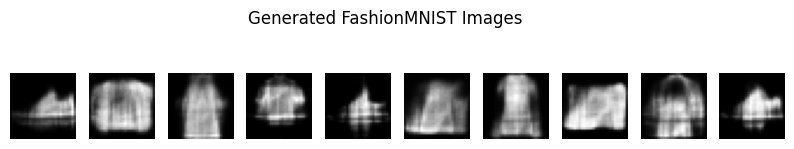

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Fully connected VAE architecture for 28x28 FashionMNIST images
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder: maps input to hidden representation
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)     # Mean of latent distribution
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim) # Log variance of latent distribution

        # Decoder: maps latent vector back to input space
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc_mu(h1), self.fc_logvar(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h2 = torch.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h2))

    def forward(self, x):
        # Flatten the image to a 784-dim vector
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

# Loss function: reconstruction loss (BCE) + KL divergence
def loss_function(recon_x, x, mu, logvar):
    # Flatten x and compute binary cross entropy
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    # KL divergence between learned latent distribution and standard normal distribution
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training function for one epoch
def train(model, train_loader, optimizer, epoch, device):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print('Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

# Function to generate and display new images from the trained VAE
def generate_images(model, num_images=10, latent_dim=20, device='cpu'):
    model.eval()
    with torch.no_grad():
        # Sample random points from a standard normal distribution
        z = torch.randn(num_images, latent_dim).to(device)
        generated_images = model.decode(z).cpu()
    # Plot the generated images in a single row
    fig, axs = plt.subplots(1, num_images, figsize=(num_images, 2))
    for i in range(num_images):
        axs[i].imshow(generated_images[i].view(28, 28), cmap='gray')
        axs[i].axis('off')
    plt.suptitle("Generated FashionMNIST Images")
    plt.show()

# Main function to train the VAE on FashionMNIST and display generated images
def main():
    # Use GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Transform: convert images to tensors (scaling pixel values to [0,1])
    transform = transforms.ToTensor()

    # Load the FashionMNIST training dataset
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

    # Define model parameters
    input_dim = 784  # 28 x 28
    hidden_dim = 400
    latent_dim = 20

    # Instantiate the VAE and optimizer
    model = VAE(input_dim, hidden_dim, latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    # Train the VAE for a number of epochs
    num_epochs = 10
    for epoch in range(1, num_epochs + 1):
        train(model, train_loader, optimizer, epoch, device)

    # After training, generate and display new images from the latent space
    generate_images(model, num_images=10, latent_dim=latent_dim, device=device)

if __name__ == '__main__':
    main()


Epoch: 1 Average loss: 285.6329
Epoch: 2 Average loss: 255.8529
Epoch: 3 Average loss: 250.1973
Epoch: 4 Average loss: 247.4788
Epoch: 5 Average loss: 245.8555
Epoch: 6 Average loss: 244.7076
Epoch: 7 Average loss: 243.9843
Epoch: 8 Average loss: 243.2858
Epoch: 9 Average loss: 242.7656
Epoch: 10 Average loss: 242.3624


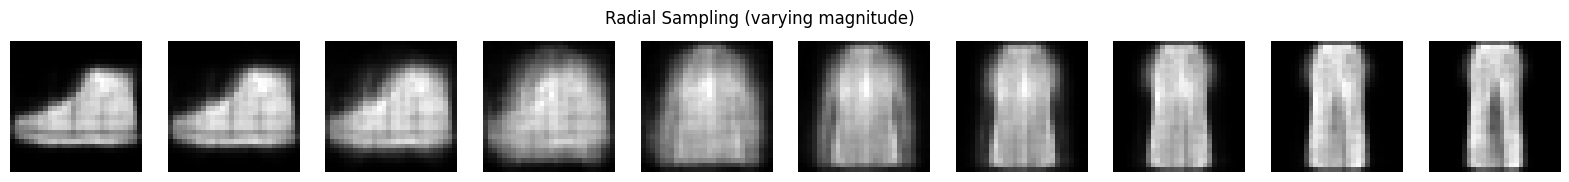

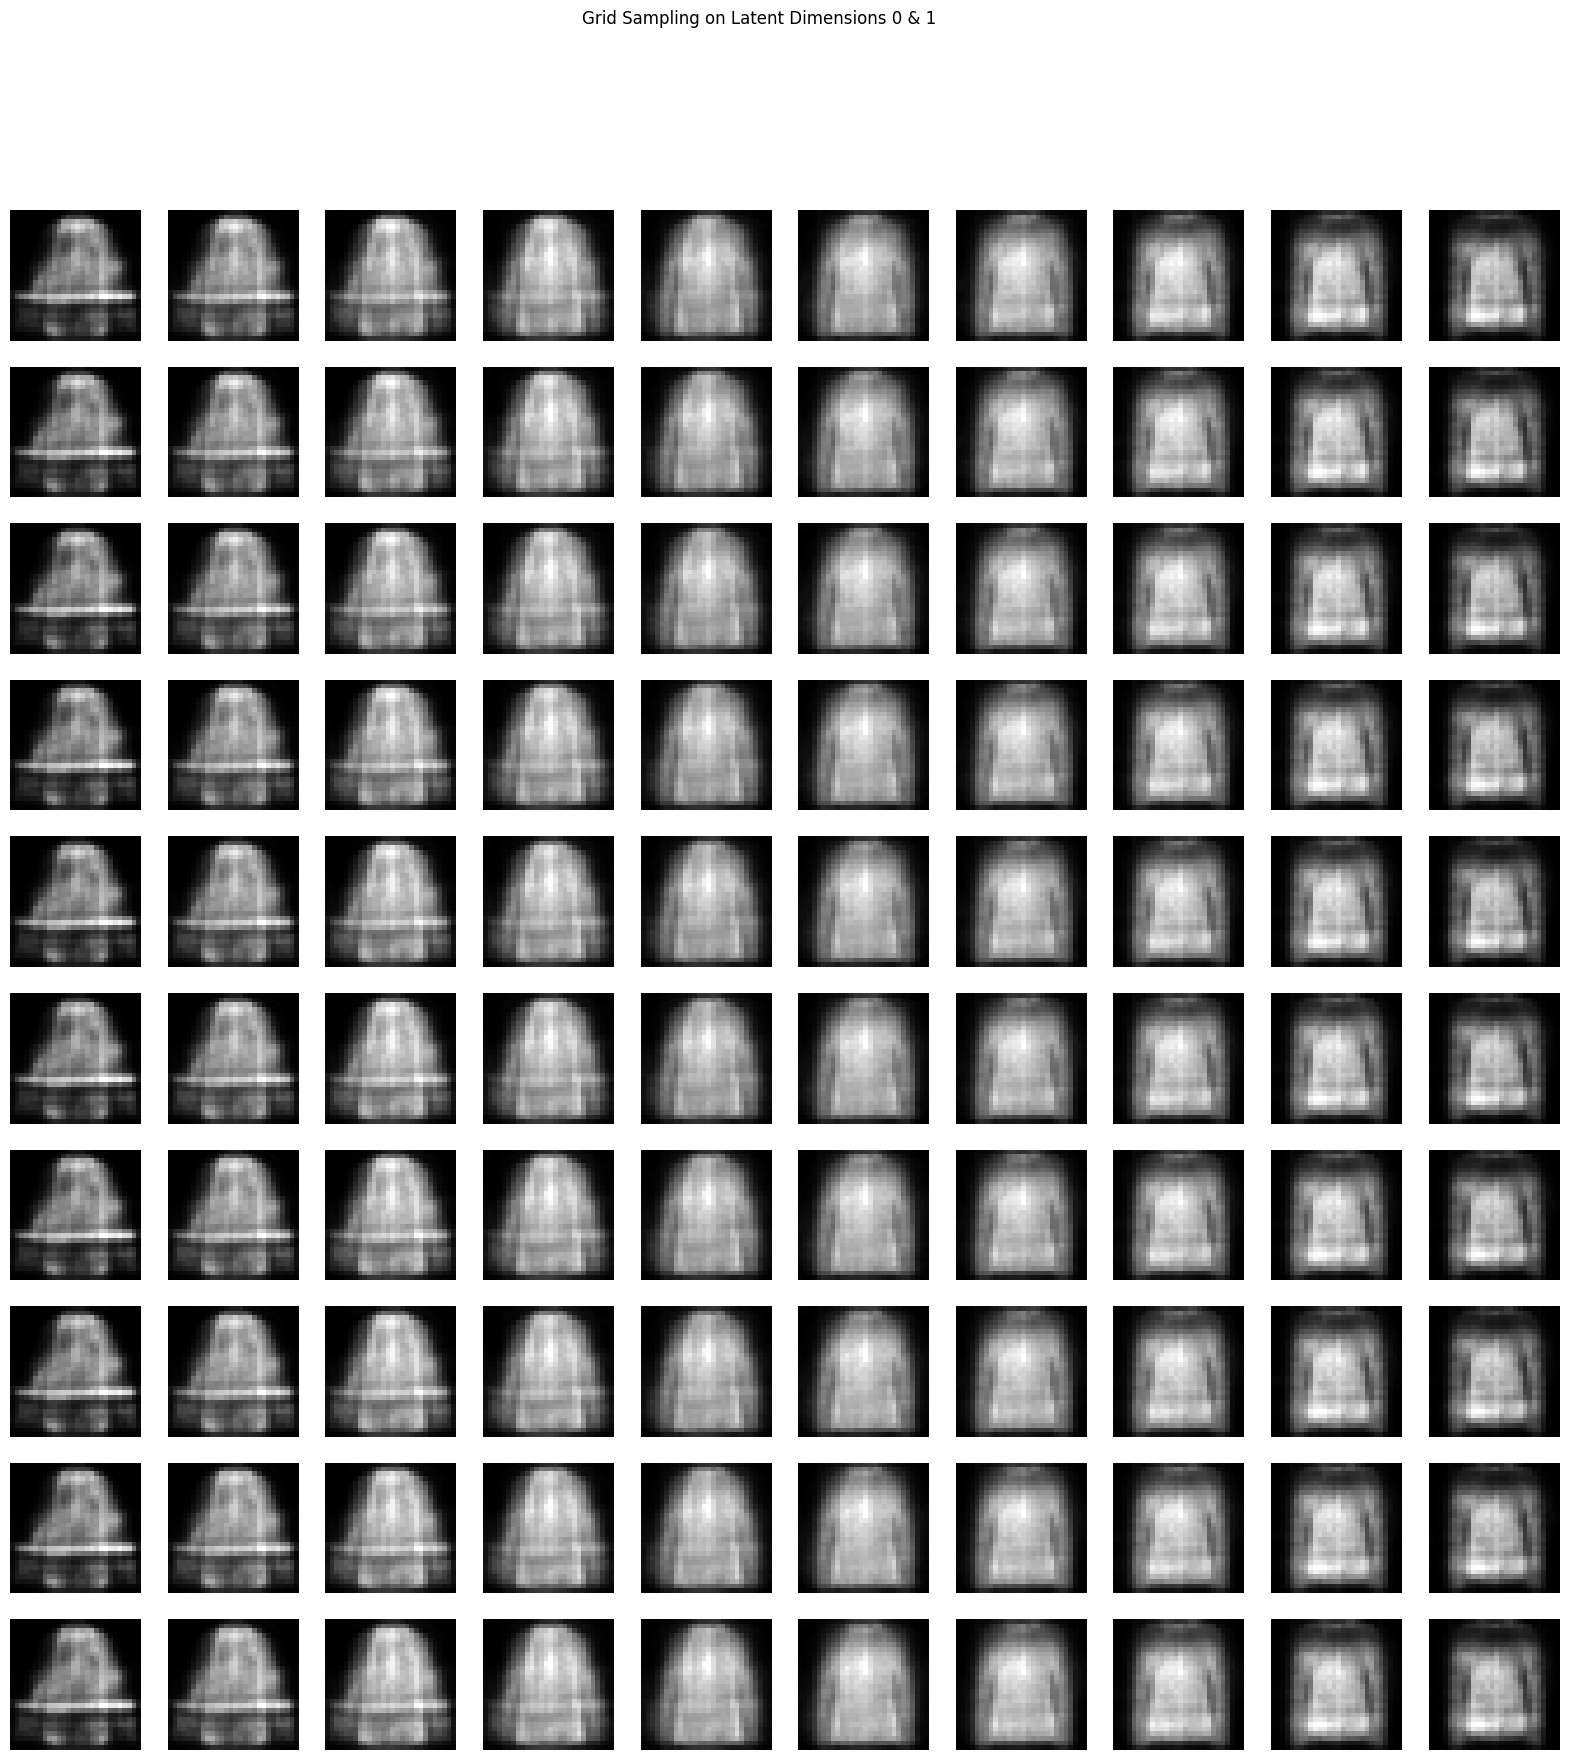

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Fully connected VAE architecture for FashionMNIST (28x28 grayscale)
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder: maps input to hidden representation
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)     # Mean of latent distribution
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)   # Log variance of latent distribution

        # Decoder: maps latent vector back to input space
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc_mu(h1), self.fc_logvar(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h2 = torch.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h2))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

# Loss: Reconstruction (binary cross entropy) + KL divergence
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training function for one epoch
def train(model, train_loader, optimizer, epoch, device):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print('Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

# Function to generate images given a set of latent vectors and display them in a grid.
def display_generated_images(model, latent_vectors, grid_shape, title, device):
    model.eval()
    with torch.no_grad():
        decoded = model.decode(latent_vectors.to(device)).cpu()
    # For FashionMNIST, reshape to 28x28 images
    num_images = latent_vectors.shape[0]
    fig, axs = plt.subplots(grid_shape[0], grid_shape[1], figsize=(grid_shape[1]*2, grid_shape[0]*2))
    axs = np.array(axs)
    axs = axs.reshape(-1)
    for i in range(num_images):
        axs[i].imshow(decoded[i].view(28, 28), cmap='gray')
        axs[i].axis('off')
    plt.suptitle(title)
    plt.show()

# Function to perform radial sampling: vary the magnitude of latent vectors.
def radial_sampling(model, latent_dim, num_samples=10, device='cpu'):
    # Generate latent vectors along a straight line in a fixed random direction.
    # For simplicity, choose a unit vector in latent space.
    direction = torch.randn(latent_dim)
    direction = direction / torch.norm(direction)
    # Sample magnitudes from -3 to 3
    magnitudes = torch.linspace(-3, 3, steps=num_samples)
    latent_vectors = torch.stack([m * direction for m in magnitudes])
    return latent_vectors

# Function to perform grid sampling on two selected latent dimensions (others fixed to zero)
def grid_sampling(latent_dim, grid_size=10, dim1=0, dim2=1, device='cpu'):
    # Create a grid in the two chosen dimensions
    lin = torch.linspace(-3, 3, grid_size)
    latent_vectors = []
    for i in lin:
        for j in lin:
            z = torch.zeros(latent_dim)
            z[dim1] = i
            z[dim2] = j
            latent_vectors.append(z)
    latent_vectors = torch.stack(latent_vectors)
    return latent_vectors

def main():
    # Device configuration: GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Data: FashionMNIST (28x28 grayscale images)
    transform = transforms.ToTensor()
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

    # Model parameters
    input_dim = 784
    hidden_dim = 400
    latent_dim = 20  # You can also try a lower-dimensional latent space (e.g. 2 or 3) for easier visualization.

    # Instantiate and train the VAE on FashionMNIST
    model = VAE(input_dim, hidden_dim, latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    num_epochs = 10
    for epoch in range(1, num_epochs + 1):
        train(model, train_loader, optimizer, epoch, device)

    # Experiment 1: Radial Sampling from the latent space
    latent_vectors_radial = radial_sampling(model, latent_dim, num_samples=10, device=device)
    display_generated_images(model, latent_vectors_radial, grid_shape=(1, 10),
                             title="Radial Sampling (varying magnitude)", device=device)

    # Experiment 2: Grid Sampling along two latent dimensions (e.g., dimension 0 and 1)
    grid_size = 10
    latent_vectors_grid = grid_sampling(latent_dim, grid_size=grid_size, dim1=0, dim2=1, device=device)
    display_generated_images(model, latent_vectors_grid, grid_shape=(grid_size, grid_size),
                             title="Grid Sampling on Latent Dimensions 0 & 1", device=device)

if __name__ == '__main__':
    main()
